## Chapter 8: Astropy

### Section 8.2: Units

Text(0.5, 0, 'Wavelength ($\\mu$m)')

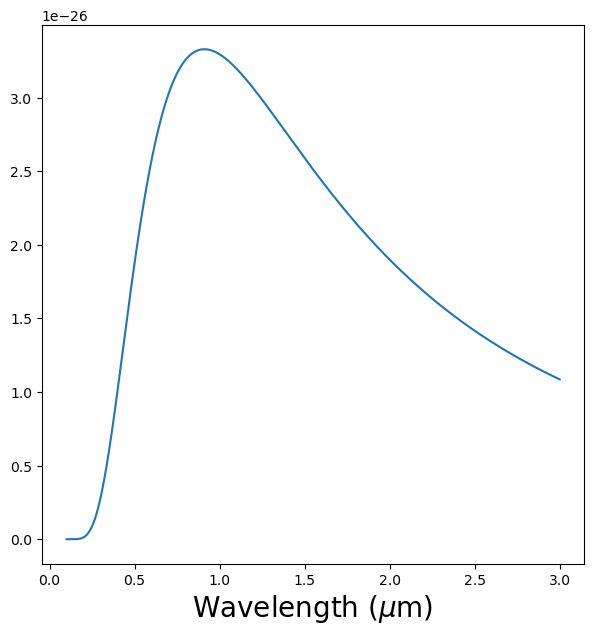

In [7]:
import matplotlib.pyplot as plt
import astropy.constants as ac
import astropy.units as u
import numpy as np

def BnU(T, nu):
    return (2 * ac.h * nu**3) / (ac.c**2 * (np.exp(ac.h * nu / (ac.k_B * T))- 1))

T = 5600 * u.K
wl = np.linspace(0.1, 3, 1000) * u.micron
nu = ac.c / wl 

B_plot = BnU(T, nu)

fig, ax=plt.subplots(figsize=(7, 7))
ax.plot(wl, B_plot)
ax.set_xlabel(r'Wavelength ($\mu$m)', fontsize=20)

In [8]:
B_plot

<Quantity [2.76070478e-33, 5.23007622e-33, 9.54467471e-33, 1.68308804e-32,
           2.87563091e-32, 4.77206498e-32, 7.70878904e-32, 1.21461502e-31,
           1.87002466e-31, 2.81788178e-31, 4.16208353e-31, 6.03392211e-31,
           8.59659536e-31, 1.20498680e-30, 1.66347838e-30, 2.26383233e-30,
           3.03978954e-30, 4.03055562e-30, 5.28118483e-30, 6.84291649e-30,
           8.77345521e-30, 1.11371876e-29, 1.40053298e-29, 1.74560008e-29,
           2.15742199e-29, 2.64518266e-29, 3.21873231e-29, 3.88856419e-29,
           4.66578408e-29, 5.56207312e-29, 6.58964426e-29, 7.76119319e-29,
           9.08984422e-29, 1.05890920e-28, 1.22727395e-28, 1.41548338e-28,
           1.62495991e-28, 1.85713690e-28, 2.11345184e-28, 2.39533949e-28,
           2.70422512e-28, 3.04151796e-28, 3.40860470e-28, 3.80684337e-28,
           4.23755739e-28, 4.70202997e-28, 5.20149889e-28, 5.73715160e-28,
           6.31012077e-28, 6.92148013e-28, 7.57224087e-28, 8.26334835e-28,
           8.99567927e-28

In [9]:
B_plot.to(u.erg/u.s/u.cm**2/u.Hz)

<Quantity [2.76070478e-12, 5.23007622e-12, 9.54467471e-12, 1.68308804e-11,
           2.87563091e-11, 4.77206498e-11, 7.70878904e-11, 1.21461502e-10,
           1.87002466e-10, 2.81788178e-10, 4.16208353e-10, 6.03392211e-10,
           8.59659536e-10, 1.20498680e-09, 1.66347838e-09, 2.26383233e-09,
           3.03978954e-09, 4.03055562e-09, 5.28118483e-09, 6.84291649e-09,
           8.77345521e-09, 1.11371876e-08, 1.40053298e-08, 1.74560008e-08,
           2.15742199e-08, 2.64518266e-08, 3.21873231e-08, 3.88856419e-08,
           4.66578408e-08, 5.56207312e-08, 6.58964426e-08, 7.76119319e-08,
           9.08984422e-08, 1.05890920e-07, 1.22727395e-07, 1.41548338e-07,
           1.62495991e-07, 1.85713690e-07, 2.11345184e-07, 2.39533949e-07,
           2.70422512e-07, 3.04151796e-07, 3.40860470e-07, 3.80684337e-07,
           4.23755739e-07, 4.70202997e-07, 5.20149889e-07, 5.73715160e-07,
           6.31012077e-07, 6.92148013e-07, 7.57224087e-07, 8.26334835e-07,
           8.99567927e-07

In [11]:
print(T)
print(T.value)

5600.0 K
5600.0


In [14]:
p = 2*u.arcsec
d = p.to(u.kpc, equivalencies=u.parallax())
d

<Quantity 0.0005 kpc>

In [15]:
nu = wl.to(u.Hz, equivalencies=u.spectral())

### 8.3： Cosmological Calculations

In [16]:
import numpy as np
from astropy.cosmology import WMAP9 as cosmo

In [17]:
cosmo.comoving_distance(z=0.55)

C:\Users\Jin\anaconda3\envs\astropython\Lib\site-packages\IPython\core\interactiveshell.py:3670: FutureWarning: Passing 'z' as keyword is deprecated since version 7.0 and will stop working in a future release. Pass it positionally to suppress this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


<Quantity 2080.47740748 Mpc>

In [20]:
c

<Quantity 16855.09481854 Mpc>

In [33]:
#Exercise 8.1: Galaxy Flux
from astropy.constants import L_sun

luminosity_distance = cosmo.luminosity_distance(z=2.5)
luminosity = 10 * L_sun

flux = luminosity / (4 * np.pi * luminosity_distance**2)

print(flux.to(u.erg / u.s / u.cm**2))

7.354335518425418e-25 erg / (s cm2)


In [34]:
d_A = cosmo.angular_diameter_distance(z=0.8)
d_A

<Quantity 1574.62956404 Mpc>

In [35]:
((0.1 * u.arcsec.to(u.rad)) * d_A).to(u.pc)

<Quantity 763.40195533 pc>

<Quantity 1573800.47166535 kpc>

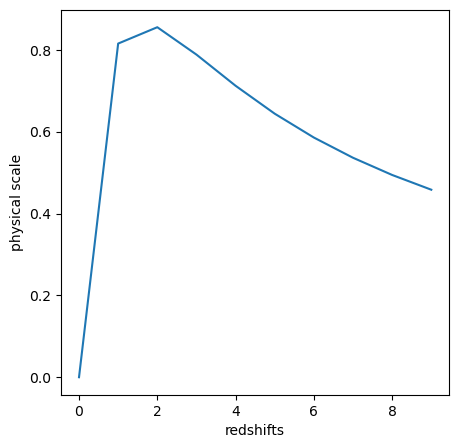

In [58]:
#Exercise 8.2

physical_scale = []
redshifts = []

for i in np.arange(10):
    d_A = cosmo.angular_diameter_distance(i)
    x = ((0.1 * u.arcsec.to(u.rad)) * d_A).to(u.kpc)
    physical_scale.append(x)
    redshifts.append(i)

physical_scale = u.Quantity(physical_scale)

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(redshifts, physical_scale)
ax.set_xlabel('redshifts')
ax.set_ylabel('physical scale')

In [62]:
from astropy.cosmology import z_at_value

d_A_known = 0.763 * u.kpc / (0.1 * u.arcsec.to(u.rad))

z = z_at_value(cosmo.angular_diameter_distance, d_A_known, zmin=2, zmax=4)

print(z)

3.3268814254749635 redshift


### Section 8.4: Coordinates

In [38]:
from astropy.coordinates import SkyCoord
coordinate = SkyCoord.from_name('M81')
coordinate

<SkyCoord (ICRS): (ra, dec) in deg
    (148.8882194, 69.06529514)>

In [39]:
coordinate.to_string('hmsdms')

'09h55m33.17265565s +69d03m55.06250537s'

In [40]:
coordinate.galactic

<SkyCoord (Galactic): (l, b) in deg
    (142.09182236, 40.90005611)>

In [41]:
import astropy.units as u

offset_star = SkyCoord(ra=148.88917, dec=69.06114, unit='deg')

offset = offset_star.spherical_offsets_to(coordinate)
offsets = [i.to(u.arcsec) for i in offset]
offsets

[<Angle -1.22275264 arcsec>, <Angle 14.95851484 arcsec>]

### Section 8.6: Research Example: Automatic Offsets

In [66]:
from astroquery.gaia import Gaia
Gaia.Main_GAIA_TABLE = "gaiadr3.gaia_source"
import numpy as np
class NoMatchesError(Exception):
    pass

def find_offset_star(target_coordinate:SkyCoord,
                     cone_radius:u.Quantity = 1 * u.arcmin,
                     limiting_magnitude: float = 15.0):
    j = Gaia.cone_search_async(target_coordinate, radius=cone_radius)
    r = j.get_results()
    r = r[r['phot_g_mean_mag']<limiting_magnitude]
    if len(r) == 0:
        raise NoMatchesError('No stars match the search criteria')
    star_coords = SkyCoord(ra=r['ra'], dec=r['dec'], unit='deg')
    all_seperations = target_coordinate.separation(star_coords)
    ind = np.argmin(all_seperations)
    best_star_coord = SkyCoord(ra=r['ra'][ind], dec=r['dec'][ind], unit='deg')
    final_offset = best_star_coord.spherical_offsets_to(target_coordinate)
    offsets_arcsec = [i.to(u.arcsec) for i in final_offset]
    return best_star_coord, offsets_arcsec

In [67]:
coord_star, os = find_offset_star(coordinate)

INFO: Query finished. [astroquery.utils.tap.core]


In [68]:
os

[<Angle 39.23849035 arcsec>, <Angle 4.08555925 arcsec>]

### Section 8.7: Research Example: Handling Astronomical Images

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

hdu = fits.open(r'C:\Users\Jin\Downloads\BookDatasets\HST_JWST\jwst_f277W_crop.fits')
image = hdu[0].data
header = hdu[0].header

In [77]:
with fits.open('../../BookDatasets/HST_JWST/jwst_f277W_crop.fits') as hdu:
    image = hdu[0].data
    header = hdu[0].header

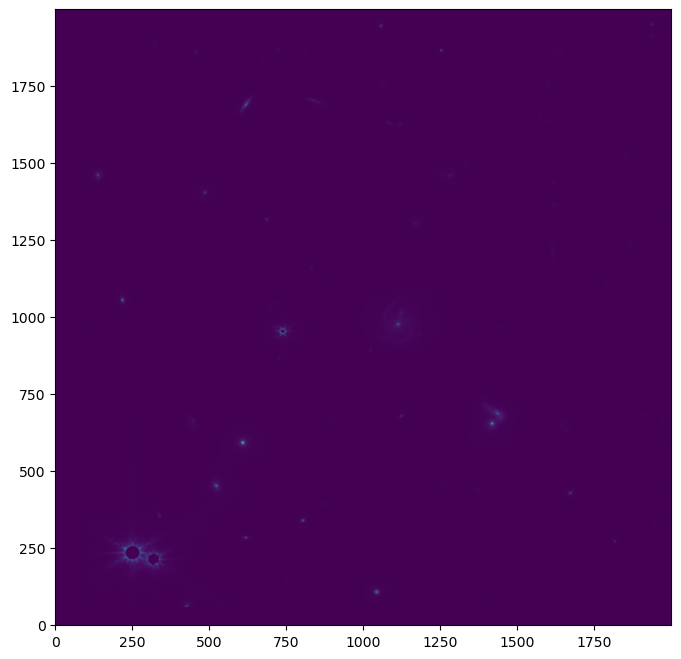

In [78]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, origin='lower')

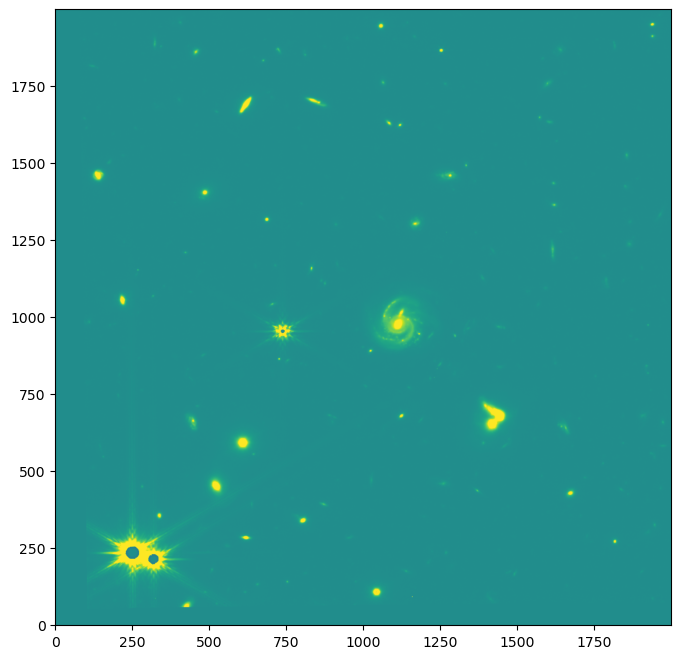

In [80]:
s = 5
vmin = np.mean(image) - s * np.std(image)
vmax = np.mean(image) + s * np.std(image)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, vmin=vmin, vmax=vmax, origin='lower')

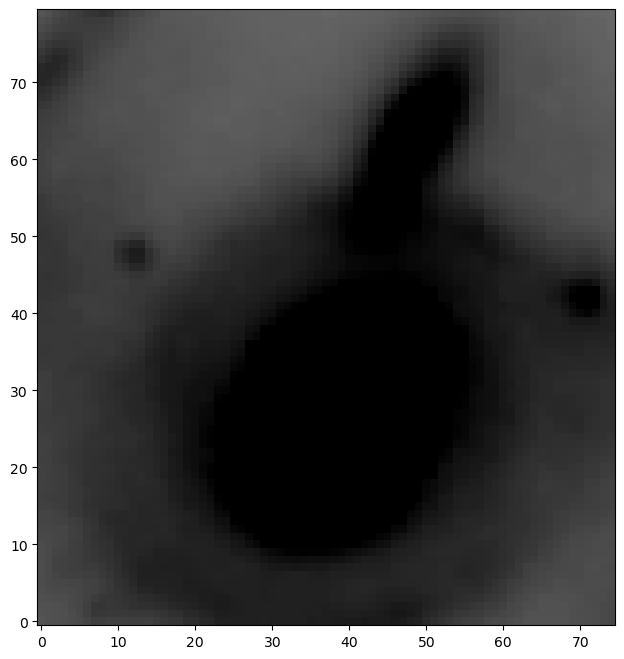

In [132]:
#Exercise 8.3

s = 4
vmin = np.mean(image) - s * np.std(image)
vmax = np.mean(image) + s * np.std(image)

cropped = image[950:1030, 1075:1150]

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cropped, vmin=vmin, vmax=vmax, origin='lower', cmap='gray_r')

### Section 8.71： The World Coordinate System

Set OBSGEO-B to   -36.849188 from OBSGEO-[XYZ].
Set OBSGEO-H to 1725785823.910 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


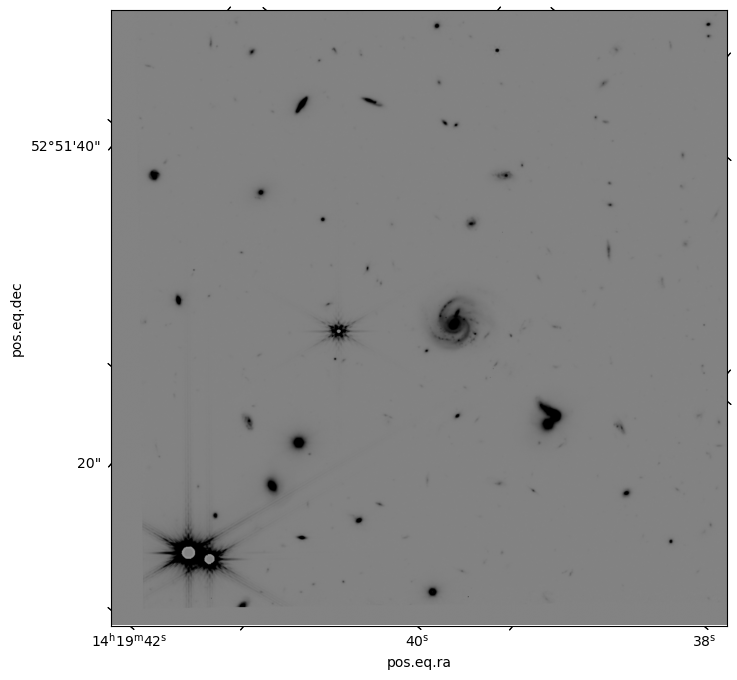

In [138]:
from astropy.wcs import WCS

im_wcs = WCS(header)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': im_wcs})
ax.imshow(image, vmin=vmin, vmax=vmax, origin='lower', cmap='gray_r');

In [139]:
ax

<WCSAxes: >

(<matplotlib.patches.Circle at 0x26c88982610>,)

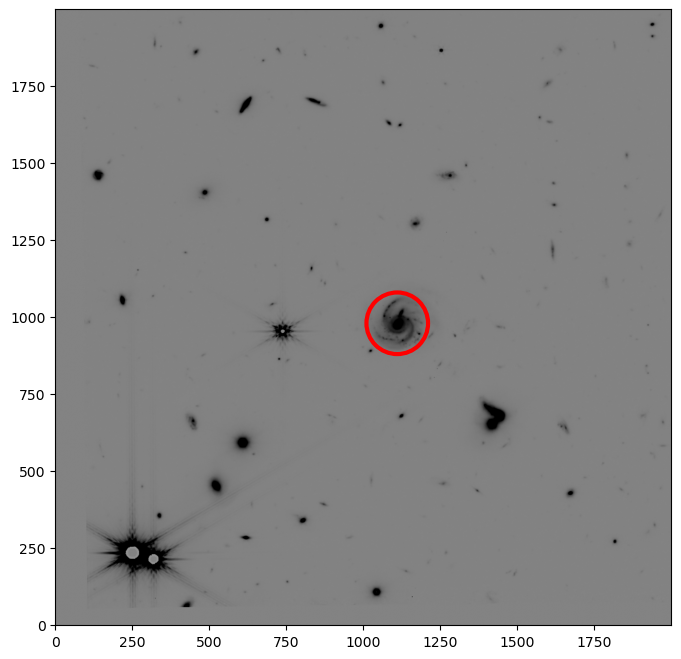

In [141]:
from photutils.aperture import CircularAperture

aperture = CircularAperture([1110,980], r=100)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, vmin=vmin, vmax=vmax, origin='lower', cmap='gray_r');
aperture.plot(color='r', lw=3)

In [142]:
aperture.to_sky(im_wcs)

<SkyCircularAperture(<SkyCoord (ICRS): (ra, dec) in deg
    (214.9052996, 52.85095396)>, r=2.999998303409702 arcsec)>

In [144]:
coord = aperture.to_sky(im_wcs).positions
coord.to_string('hmsdms')

'14h19m37.27190414s +52d51m03.43427078s'

### Section 8.7.2: Image Cutouts

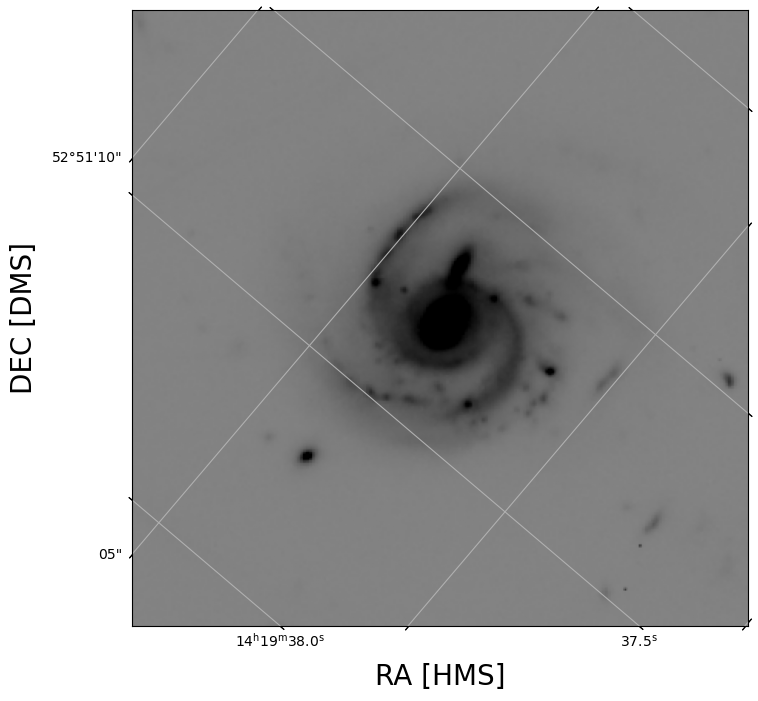

In [148]:
from astropy.nddata import Cutout2D
import astropy.units as u

cutout = Cutout2D(data = image, position = coord, size=12 * u.arcsec, wcs = im_wcs)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': cutout.wcs})
ax.imshow(cutout.data, vmin=vmin, vmax=vmax, origin='lower', cmap='gray_r');
ax.set_xlabel('RA [HMS]', fontsize=20)
ax.set_ylabel('DEC [DMS]', fontsize=20)
ax.grid()

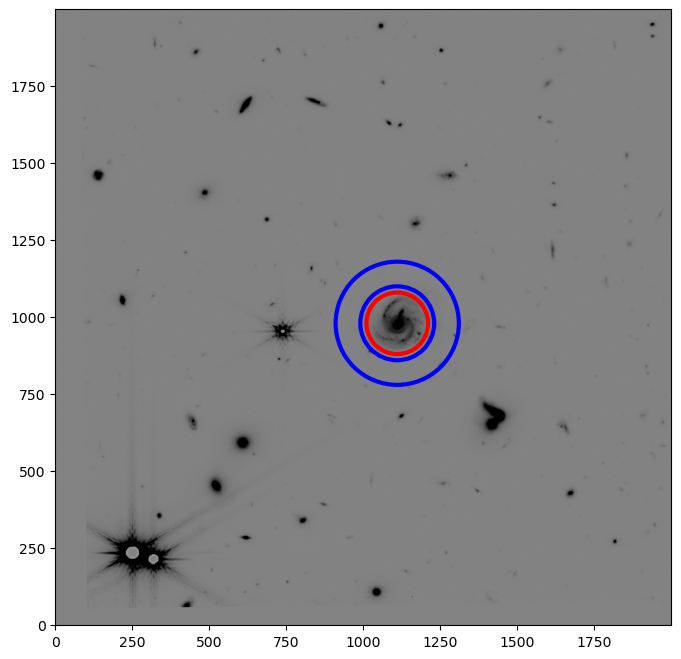

In [158]:
from photutils.aperture import CircularAnnulus

aperture = CircularAperture([(1110, 980)], r=100)
bg_aperture = CircularAnnulus([(1110,980)], r_in=120, r_out=200)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(image, vmin=vmin, vmax=vmax, origin='lower', cmap='gray_r');
aperture.plot(color='r', lw=3)
bg_aperture.plot(color='b', lw=3)


In [157]:
from photutils.aperture import ApertureStats, aperture_photometry

phot_table = aperture_photometry(image, aperture)
flux = phot_table['aperture_sum'][0]
bg_Stats = ApertureStats(image, bg_aperture)
bkg_mean = bg_Stats.mean[0]
print(flux)
print(bkg_mean)

8312.259999858908
0.0074764478284599645


In [160]:
print(f'Aperture Area: {aperture.area:.4f}')

final_flux = flux - bkg_mean * aperture.area
print(f'Final flux measurement: {final_flux:.3f}')

Aperture Area: 31415.9265
Final flux measurement: 8077.380


In [170]:
import glob
from photutils.aperture import CircularAperture
from photutils.aperture import CircularAnnulus
from photutils.aperture import ApertureStats, aperture_photometry

fluxes = []
wavelengths = []

files = sorted(glob.glob(r'C:\Users\Jin\Downloads\BookDatasets\HST_JWST\*fits'))

for file in files:
    with fits.open(file) as hdu:
        image = hdu[0].data
        header = hdu[1].header
        
        aperture = CircularAperture([1110,980], r=100)
        bg_aperture = CircularAnnulus([(1110,980)], r_in=120, r_out=200)
        
        phot_table = aperture_photometry(image, aperture)
        flux = phot_table['aperture_sum'][0]
        bg_Stats = ApertureStats(image, bg_aperture)
        bkg_mean = bg_Stats.mean[0]
        final_flux = flux - bkg_mean * aperture.area
        
        fluxes.append(final_flux)

    
print(list(header.keys()))

['XTENSION', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'PCOUNT', 'GCOUNT']
